In [6]:
import pandas as pd

#buat dataset untuk train.csv & test.csv
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")




**Pemisahan Fitur dan target**
Memisahkan kolom target 'Hardness' dari fitur-fitur lain

In [7]:
#hapus kolom id dna hardness dari train_data di x_train
x_train = train_data.drop(['id','Hardness'], axis=1)


y_train = train_data['Hardness']

x_test = test_data.drop('id', axis=1)


**PEMODELAN**

In [8]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

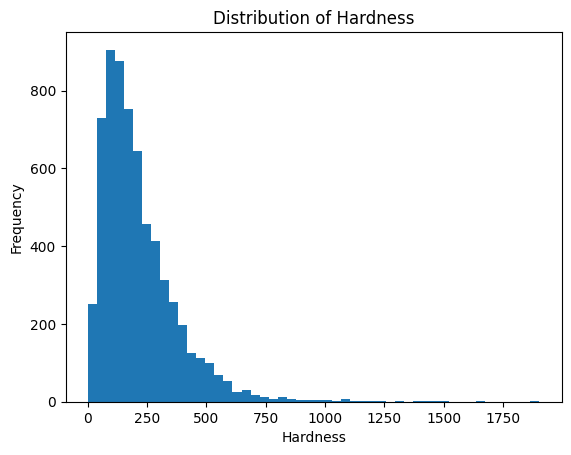

In [9]:
import matplotlib.pyplot as plt

plt.hist(y_train, bins=50)
plt.xlabel('Hardness')
plt.ylabel('Frequency')
plt.title('Distribution of Hardness')
plt.show()

In [10]:
print(model.fit(x_train, y_train))

RandomForestRegressor()


In [11]:
predictions = model.predict(x_test)

In [12]:
submission = pd.DataFrame({'id': test_data['id'], 'Hardness': predictions})
submission.to_csv('submission.csv', index=False)
print(submission)


        id   Hardness
0     6400   86.39000
1     6401  139.56367
2     6402  119.12818
3     6403   98.88800
4     6404  328.26000
...    ...        ...
1596  7996   86.78258
1597  7997   53.53500
1598  7998  186.92000
1599  7999  237.70000
1600  8000  189.31000

[1601 rows x 2 columns]


**Optimizing & Perfecting**

In [13]:
from sklearn.model_selection import cross_val_score


# Melakukan validasi silang
scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Menghitung rata-rata dan standar deviasi dari skor
mean_score = scores.mean()
std_score = scores.std()

print(f'Rata-rata MSE: {-mean_score}, Standar Deviasi: {std_score}')


Rata-rata MSE: 2338.281372881711, Standar Deviasi: 964.5582404940362


**Tuning Model**

In [14]:
from sklearn.model_selection import GridSearchCV


# Menentukan hyperparameter yang akan dicoba
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40],
}

# Melakukan pencarian grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Mendapatkan hyperparameter terbaik
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Hyperparameter terbaik: {best_params}')
print(f'Skor terbaik: {-best_score}')


KeyboardInterrupt: 

**Penyempurnaan**


In [ ]:
# Membuat model dengan hyperparameter terbaik
best_model = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])

# Melatih model
best_model.fit(x_train, y_train)

# Membuat prediksi pada data uji
predictions = best_model.predict(x_test)

# Menyiapkan file submission
submission = pd.DataFrame({'id': test_data['id'], 'Hardness': predictions})
submission.to_csv('submission.csv', index=False)


NameError: name 'y_train' is not defined